In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import model_selection
%matplotlib inline

In [19]:

data = pd.read_csv("StandardizedDataFrameWithNansFilled.csv", index_col=0)
data["Status"] = [1 if stat == "Developed" else 0 for stat in data["Status"]]
data.head()

y = data['Life expectancy '].values
y=y.T
X_drop = data.drop(columns = ['Country','Year','Life expectancy '])


# Add offset attribute
attributeNames = X_drop.columns
X_drop = np.concatenate((np.ones((X_drop.shape[0],1)),X_drop),1)
attributeNames = [u'Offset']+attributeNames
N, M = X_drop.shape
X = X_drop


## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=True)

# Values of lambda
lambdas = np.power(10.,range(-5,9))
# Initialize variables

#T = len(lambdas)
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Compute mean squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum(axis=0)/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    #opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train, lambdas, internal_cross_validation)

    k=0
    lol =[]
    lambs = []
    for lamb in lambdas:

        # Estimate weights for the value of lambda, on entire training set
        lambdaI = lamb * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
        # Compute mean squared error with regularization with lambda
        lol.append(np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0])
        Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]
        lambs.append(lamb)

        # Display the results for the last cross-validation fold
        k =+1
    

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05 1.e+06 1.e+07 1.e+08]
[0.18049956531639913, 0.1804995653179755, 0.18049956547557727, 0.1804995811988003, 0.1805011172671959, 0.18062442007605595, 0.18353028159799772, 0.18901971143789556, 0.20143183799533876, 0.3949865599069311, 0.8429515488658708, 0.9786013606011248, 0.9947614533405652, 0.9964080416735585]


ValueError: s must be a scalar, or float array-like with the same size as x and y

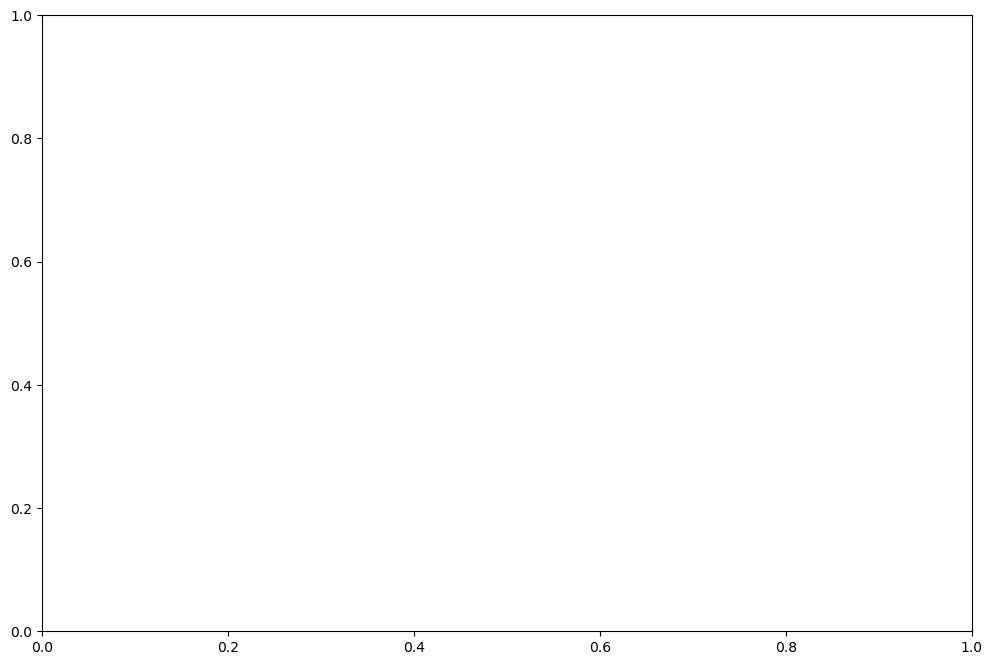

In [21]:
    print(lambdas)
    print(lol)
    plt.figure(figsize=(12,8))
    plt.scatter(lambs,lol,'.-') # Don't plot the bias term
    plt.xlabel('Regularization factor')
    plt.ylabel('Mean Coefficient Values')
    plt.grid()

    # You can choose to display the legend, but it's omitted for a cleaner 
    # plot, since there are many attributes
    #legend(attributeNames[1:], loc='best')

        
        # To inspect the used indices, use these print statements
        #print('Cross validation fold {0}/{1}:'.format(k+1,K))
        #print('Train indices: {0}'.format(train_index))
        #print('Test indices: {0}\n'.format(test_index))

In [ ]:
   plt.figure(k, figsize=(12,8))
    plt.subplot(1,2,1)
    plt.(lambdas,mean_w_vs_lambda.T[:,1:],'.-') # Don't plot the bias term
    plt.xlabel('Regularization factor')
    plt.ylabel('Mean Coefficient Values')
    plt.grid()
    # You can choose to display the legend, but it's omitted for a cleaner 
    # plot, since there are many attributes
    #legend(attributeNames[1:], loc='best')
    
    plt.subplot(1,2,2)
    plt.title('Lambda: 1e{0}'.format(np.log10(lamb)))
    plt.loglog(lambdas,train_err_vs_lambda.T,'b.-',lambdas,test_err_vs_lambda.T,'r.-')
    plt.xlabel('Regularization factor')
    plt.ylabel('Squared error (crossvalidation)')
    plt.legend(['Train error','Validation error'])
    plt.grid()
        
        # To inspect the used indices, use these print statements
        #print('Cross validation fold {0}/{1}:'.format(k+1,K))
        #print('Train indices: {0}'.format(train_index))
        #print('Test indices: {0}\n'.format(test_index))

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04
 1.e+05 1.e+06 1.e+07 1.e+08]
